# Outlier analysis with UMAP

The setup of this notebooks is to transform the control data and color the UMAP scatter with the manual COI gate. The hypothesis is that UMAP will isolate the COIs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load common_.py
from common import *

In [3]:
import umap
from ehv import core, load as e_load
from joblib import dump, load

/opt/conda/envs/env/lib/python3.8/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [4]:
reload(e_load)

<module 'ehv.load' from '/app/ehv/load.py'>

In [5]:
data = e_load.load_raw_ideas_dir("/data/weizmann/EhV/high_time_res", "ALL", ["COI"])
data = e_load.remove_unwanted_features(data)
data = e_load.tag_columns(data)

# Ctrl samples

## 2D projection

In [ ]:
core.do_umap("HTR_Ctrl_ALL", data[data["meta_group"]=="Ctrl"].filter(regex="feat_.*"), n_components=2)

In [7]:
projection2d = load("data/umap/HTR_Ctrl_ALL.dat")
df2D = pandas.concat([data[data["meta_group"]=="Ctrl"].reset_index(drop=True), projection2d], axis=1)

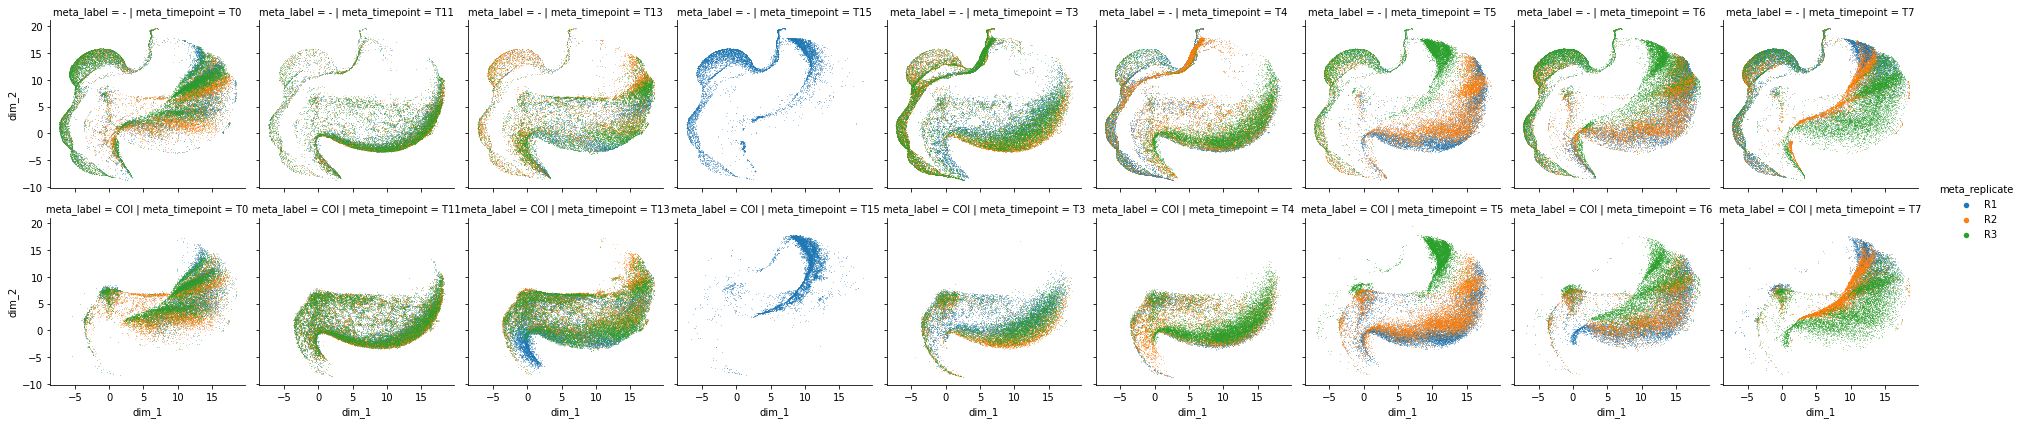

In [53]:
grid = seaborn.FacetGrid(col="meta_timepoint", row="meta_label", hue="meta_replicate", data=df2d)
grid = grid.map(plt.scatter, "dim_1", "dim_2", s=0.5, linewidths=0, edgecolors=None, alpha=0.5)
grid.add_legend()

for handle in grid._legend.legendHandles:
    handle.set_sizes([30])
    handle.set_alpha(1.0)
    
plt.savefig("figs/umap/HTR_Ctrl_ALL.png")

In [47]:
df_ctrl = pandas.concat([data[data["meta_group"]=="Ctrl"].reset_index(drop=True), projection2d], axis=1)

In [51]:
df_ctrl[
    (df_ctrl["dim_1"] > 10) & (df_ctrl["dim_1"] < 15) & 
    (df_ctrl["dim_2"] > 5) & (df_ctrl["dim_2"] < 10) & 
    (df_ctrl["meta_timepoint"] == 'T0') &
    (df_ctrl["meta_label"] == '-')
].head()[["meta_timepoint", "meta_replicate", "meta_Object Number"]]

,meta_timepoint,meta_replicate,meta_Object Number
3,T0,R1,3.0
9,T0,R1,9.0
10,T0,R1,10.0
12,T0,R1,12.0
13,T0,R1,13.0


## 1D projection

In [ ]:
core.do_umap("HTR_Ctrl_ALL_1comp", data[data["meta_group"]=="Ctrl"].filter(regex="feat_.*"), n_components=1)

In [37]:
projection1d = load("data/umap/HTR_Ctrl_ALL_1comp.dat")
df1D = pandas.concat([data[data["meta_group"]=="Ctrl"].reset_index(drop=True), projection1d], axis=1)

['data/umap/HTR_Ctrl_ALL_1comp.dat']

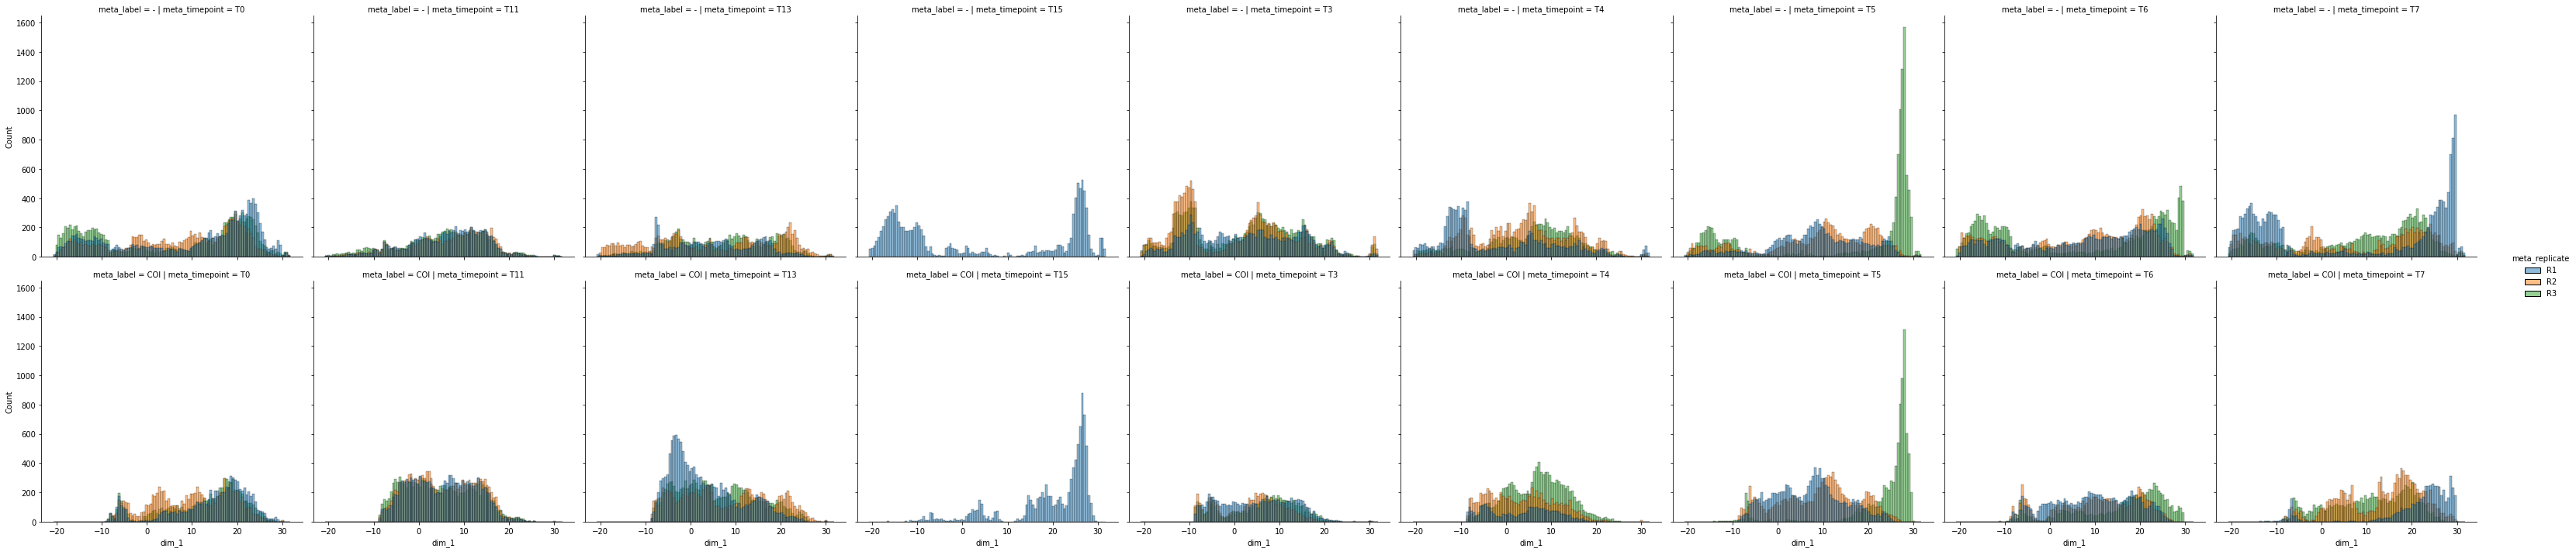

In [42]:
seaborn.displot(data=df1D, x="dim_1", col="meta_timepoint", hue="meta_replicate", row="meta_label")

# High samples

In [12]:
do_umap("HTR_High_ALL", data[data["meta_group"]=="High"].filter(regex="feat_.*"), n_components=2)

In [13]:
projection2d = load("data/umap/HTR_High_ALL.dat")
df2D = pandas.concat([data[data["meta_group"]=="High"].reset_index(drop=True), projection2d], axis=1)

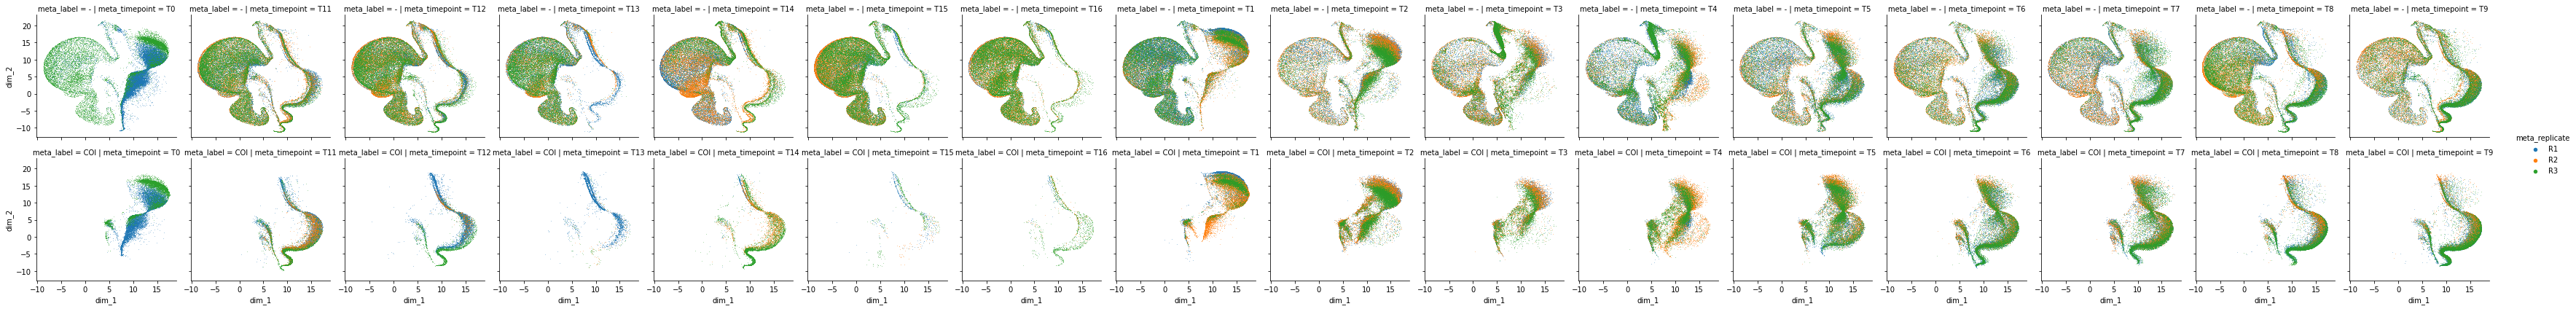

In [15]:
grid = seaborn.FacetGrid(col="meta_timepoint", row="meta_label", hue="meta_replicate", data=df2D)
grid = grid.map(plt.scatter, "dim_1", "dim_2", s=0.5, linewidths=0, edgecolors=None, alpha=0.5)
grid.add_legend()

for handle in grid._legend.legendHandles:
    handle.set_sizes([30])
    handle.set_alpha(1.0)
    
plt.savefig("figs/umap/HTR_High_ALL.png")